In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import librosa
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd


In [3]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define the path to the dataset folder
data_path = 'Dataset/fvr'  # Update with the path to your dataset

# Define the list of labels
labels = ['Fake_audios', 'Original_audios']

# Initialize empty lists to store the features and labels
all_features = []
all_labels = []

# Loop through each label folder
for label in labels:
    # Define the path to the label folder
    label_path = os.path.join(data_path, label)
    # Loop through each audio file in the label folder
    for file in os.listdir(label_path):
        # Load the audio file
        file_path = os.path.join(label_path, file)
        signal, sr = librosa.load(file_path, sr=22050)
        # Extract the features
        mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
        chroma = librosa.feature.chroma_stft(y=signal, sr=sr)
        mel = librosa.feature.melspectrogram(y=signal, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sr)
        tonnetz = librosa.feature.tonnetz(y=signal, sr=sr)
        # Concatenate the features into a single array
        features = np.concatenate((mfccs, chroma, mel, spectral_contrast, tonnetz), axis=0)
        # Transpose the feature matrix to have features along columns and time along rows
        features = features.T
        # Append the features and label to the lists
        all_features.extend(features)
        all_labels.extend([label] * features.shape[0])

# Convert the features and labels to numpy arrays
X = np.array(all_features)
y = np.array(all_labels)

# Encode the labels as integers
le = LabelEncoder()
y = le.fit_transform(y)

# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
X = np.array(X)
y = np.array(y)

X,y

(array([[-1.5417421 , -1.82403257,  0.17933293, ...,  0.21825907,
          0.28774108, -0.27297908],
        [-0.78915765, -1.09846723, -0.5743749 , ...,  0.22046822,
          0.25884277, -0.13324105],
        [-0.53911313, -0.94057382, -0.5997031 , ...,  0.18077864,
          0.17565653, -0.0071894 ],
        ...,
        [-0.68317586, -0.63670181,  0.00637718, ...,  0.2237729 ,
         -1.76760792, -0.48655239],
        [-0.6842028 , -0.50916296,  0.59996046, ..., -0.58962003,
         -0.67790177, -1.08761409],
        [ 0.21076375, -0.00517869,  0.90392974, ..., -0.67800473,
         -0.24470534, -1.03372553]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(34480, 166)
(8620, 166)
(34480,)
(8620,)


In [6]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)



In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ReduceLROnPlateau

# Reshape your data

model = Sequential()
model.add(Conv2D(32, (3, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1)))
model.add(MaxPooling2D((2, 1)))
model.add(Conv2D(64, (3, 1), activation='relu'))
model.add(MaxPooling2D((2, 1)))
model.add(Conv2D(128, (3, 1), activation='relu'))
model.add(MaxPooling2D((2, 1)))
model.add(Conv2D(256, (3, 1), activation='relu'))
model.add(MaxPooling2D((2, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the learning rate callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model with the learning rate callback
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr])

Epoch 1/20
1078/1078 [==============================] - 13s 11ms/step - loss: 0.4628 - accuracy: 0.7635 - val_loss: 0.3438 - val_accuracy: 0.8411 - lr: 0.0010
Epoch 2/20
1078/1078 [==============================] - 11s 10ms/step - loss: 0.3098 - accuracy: 0.8610 - val_loss: 0.2647 - val_accuracy: 0.8821 - lr: 0.0010
Epoch 3/20
1078/1078 [==============================] - 11s 11ms/step - loss: 0.2441 - accuracy: 0.8955 - val_loss: 0.2553 - val_accuracy: 0.8903 - lr: 0.0010
Epoch 4/20
1078/1078 [==============================] - 11s 10ms/step - loss: 0.2053 - accuracy: 0.9129 - val_loss: 0.1819 - val_accuracy: 0.9275 - lr: 0.0010
Epoch 5/20
1078/1078 [==============================] - 11s 11ms/step - loss: 0.1794 - accuracy: 0.9262 - val_loss: 0.1921 - val_accuracy: 0.9203 - lr: 0.0010
Epoch 6/20
1078/1078 [==============================] - 11s 10ms/step - loss: 0.1693 - accuracy: 0.9287 - val_loss: 0.2706 - val_accuracy: 0.8854 - lr: 0.0010
Epoch 7/20
1078/1078 [========================

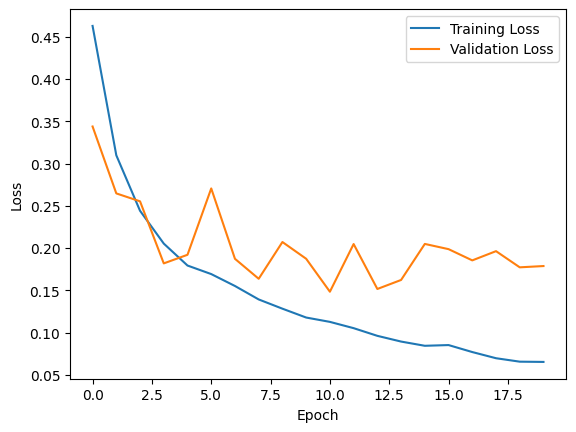

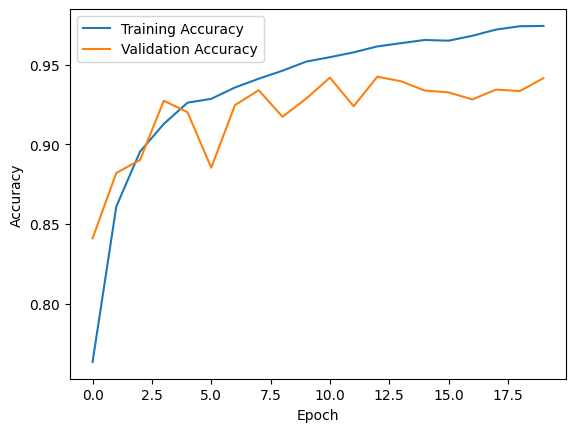

In [9]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


270/270 [==============================] - 1s 5ms/step


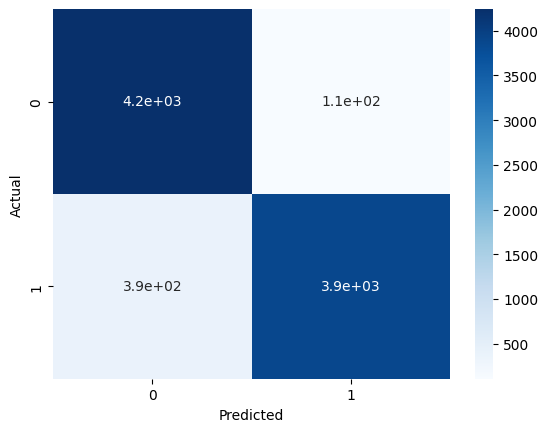

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)
# Convert the predictions to binary values
y_pred = (y_pred > 0.5)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [10]:
model.save("Models/audio_classifier.h5")

In [11]:

import numpy as np
from scipy.io import wavfile

import keras
from keras.models import load_model
# Load the trained model
model = load_model("Models/audio_classifier.h5")

# Load the .wav file
fs, data = wavfile.read("Dataset/fvr/Original_audios/speaker1_1.wav")
# Reshape the data to match the input shape of the model
data = np.reshape(data, (1, data.shape[0], 1, 1))
# Make a prediction
prediction = model.predict(data)
# Print the prediction
print(prediction)


ValueError: in user code:

    File "c:\Users\Towfiq Mohammed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Towfiq Mohammed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Towfiq Mohammed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Towfiq Mohammed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\Towfiq Mohammed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Towfiq Mohammed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 166, 1, 1), found shape=(None, 441000, 1, 1)
